In [68]:
"""!pip install pandas
!pip install matplotlib
!pip install seaborn 
!pip install numpy 
!pip install -U scikit-learn
!pip install statsmodels"""

'!pip install pandas\n!pip install matplotlib\n!pip install seaborn \n!pip install numpy \n!pip install -U scikit-learn\n!pip install statsmodels'

CARGA Y LIMPIEZA DE DATOS

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import statsmodels.api as sm

In [70]:
archivo = 'C:/Users/ymnl_/Downloads/Excel RRSS.xlsx'
df_rrss0 = pd.read_excel(archivo)
df_rrss0['Rural es mayor Urba'] = np.where(df_rrss0['POB_URBANA_INEI']-df_rrss0["POB_RURAL_INEI"] > 0, 'Si', 'No')
df_rrss0.head()

,IDDIST,NOMBDEP,NOMBPROV,NOMBDIST,NOM_CAPITAL (LEGAL),COD_ REG_NAT,REGION NATURAL,REGION_NATURAL,TIPO_MUNICIPALIDAD,POB_URBANA_INEI,POB_RURAL_INEI,CLASIFICACION_MUNICIPAL_MEF,GENERACION_MUN_TANIO,RRSS_INDUSTRIAL,MiPyME-COMERCIO,MiPyME-MANUFACTURA,GE-MANUFACTURA,Rural es mayor Urba
0,10111,AMAZONAS,CHACHAPOYAS,LEVANTO,LEVANTO,2,SIERRA,SIERRA,DISTRITAL,411.0,385.0,F,94.30,NaN,2.0,NaN,NaN,Si
1,10516,AMAZONAS,LUYA,SAN CRISTOBAL,OLTO,2,SIERRA,SIERRA,DISTRITAL,422.0,113.0,E,63.95,NaN,2.0,NaN,NaN,Si
2,20513,ANCASH,BOLOGNESI,PACLLON,PACLLON,2,SIERRA,SIERRA,DISTRITAL,730.0,100.0,E,167.48,NaN,2.0,NaN,NaN,Si
3,20605,ANCASH,CARHUAZ,ATAQUERO,CARHUAC,2,SIERRA,SIERRA,DISTRITAL,283.0,1341.0,G,92.97,NaN,2.0,NaN,NaN,No
4,20902,ANCASH,CORONGO,ACO,ACO,2,SIERRA,SIERRA,DISTRITAL,191.0,175.0,F,43.82,NaN,2.0,NaN,NaN,Si


In [71]:
#df_rrss["GENERACION_MUN_TANIO"]=df_rrss["GENERACION_MUN_TANIO"].str.replace('.', '').str.replace(',', '.').astype(float)

In [72]:
df_rrss=df_rrss0[df_rrss0["Rural es mayor Urba"]=="Si"]
df_rrss["MiPyME-COMERCIO"]=df_rrss["MiPyME-COMERCIO"].fillna(0)
df_rrss["GE-MANUFACTURA"]=df_rrss["GE-MANUFACTURA"].fillna(0)
df_rrss["MiPyME-MANUFACTURA"]=df_rrss["MiPyME-MANUFACTURA"].fillna(0)
df_rrss["GENERACION_MUN_TANIO"]=df_rrss["GENERACION_MUN_TANIO"].fillna(0)

#Convertirmos lo valores que queremos a tipo float
df_rrss[["MiPyME-COMERCIO","GE-MANUFACTURA","MiPyME-MANUFACTURA","GENERACION_MUN_TANIO"]].astype(float)


#Agregamos las transformaciones con logaritrmo
df_rrss["Log Poblacion Urbana"]=np.log(df_rrss["POB_URBANA_INEI"])
df_rrss["Log Poblacion Rural"]=np.log(df_rrss["POB_RURAL_INEI"]+1)
df_rrss["Log Residuos solidos municipales"]=np.log(df_rrss["GENERACION_MUN_TANIO"]+1)
df_rrss["Log MiPyME-COMERCIO"]=np.log(df_rrss["MiPyME-COMERCIO"]+1)
df_rrss["Log MiPyME-MANUFACTURA"]=np.log(df_rrss["MiPyME-MANUFACTURA"]+1)
df_rrss["Log GE-MANUFACTURA"]=np.log(df_rrss["GE-MANUFACTURA"]+1)


print(df_rrss.info())

<class 'pandas.core.frame.DataFrame'>
Index: 927 entries, 0 to 1889
Data columns (total 24 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   IDDIST                            927 non-null    int64  
 1   NOMBDEP                           927 non-null    object 
 2   NOMBPROV                          927 non-null    object 
 3   NOMBDIST                          927 non-null    object 
 4   NOM_CAPITAL (LEGAL)               927 non-null    object 
 5   COD_ REG_NAT                      927 non-null    int64  
 6   REGION NATURAL                    927 non-null    object 
 7   REGION_NATURAL                    927 non-null    object 
 8   TIPO_MUNICIPALIDAD                927 non-null    object 
 9   POB_URBANA_INEI                   927 non-null    float64
 10  POB_RURAL_INEI                    927 non-null    float64
 11  CLASIFICACION_MUNICIPAL_MEF       927 non-null    object 
 12  GENERACION_M

C:\Users\ymnl_\AppData\Local\Temp\ipykernel_22048\1099988012.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rrss["MiPyME-COMERCIO"]=df_rrss["MiPyME-COMERCIO"].fillna(0)
C:\Users\ymnl_\AppData\Local\Temp\ipykernel_22048\1099988012.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rrss["GE-MANUFACTURA"]=df_rrss["GE-MANUFACTURA"].fillna(0)
C:\Users\ymnl_\AppData\Local\Temp\ipykernel_22048\1099988012.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

In [73]:
df_rrss_sinNaN= df_rrss.dropna(subset=["TIPO_MUNICIPALIDAD"])

#Vemos que categorías hay en tipo de municipalidad
muni= df_rrss_sinNaN["TIPO_MUNICIPALIDAD"].unique()
print(muni)



['DISTRITAL' 'PROVINCIAL']


In [74]:
#Reemplazamos los valores de distrital y provincial
valores={"DISTRITAL":1,"PROVINCIAL":0}
df_rrss_sinNaN["TIPO_MUNICIPALIDAD CONT"]=df_rrss_sinNaN["TIPO_MUNICIPALIDAD"].map(valores)
print(df_rrss_sinNaN)

      IDDIST   NOMBDEP          NOMBPROV       NOMBDIST  \
0      10111  AMAZONAS       CHACHAPOYAS        LEVANTO   
1      10516  AMAZONAS              LUYA  SAN CRISTOBAL   
2      20513    ANCASH         BOLOGNESI        PACLLON   
4      20902    ANCASH           CORONGO            ACO   
7      21703    ANCASH            RECUAY     COTAPARACO   
...      ...       ...               ...            ...   
1884  240102    TUMBES            TUMBES       CORRALES   
1885  250101   UCAYALI  CORONEL PORTILLO       CALLERIA   
1887  250105   UCAYALI  CORONEL PORTILLO    YARINACOCHA   
1888  250107   UCAYALI  CORONEL PORTILLO       MANANTAY   
1889  250301   UCAYALI        PADRE ABAD     PADRE ABAD   

         NOM_CAPITAL (LEGAL)  COD_ REG_NAT REGION NATURAL REGION_NATURAL  \
0                    LEVANTO             2         SIERRA         SIERRA   
1                       OLTO             2         SIERRA         SIERRA   
2                    PACLLON             2         SIERRA      

In [75]:
#Revisamos los estadísticos de las principales columnas a evaluar
print(df_rrss_sinNaN.describe())

              IDDIST  COD_ REG_NAT  POB_URBANA_INEI  POB_RURAL_INEI  \
count     927.000000    927.000000     9.270000e+02      927.000000   
mean   115786.443366      1.906149     2.754755e+04     1813.551241   
std     67331.524187      0.829293     7.945714e+04     3572.940837   
min     10101.000000      1.000000     1.120000e+02        0.000000   
25%     50601.500000      1.000000     9.465000e+02      145.500000   
50%    120414.000000      2.000000     3.525000e+03      568.000000   
75%    151019.500000      2.000000     1.797750e+04     1893.000000   
max    250307.000000      4.000000     1.203125e+06    46346.000000   

       GENERACION_MUN_TANIO  MiPyME-COMERCIO  MiPyME-MANUFACTURA  \
count            927.000000       927.000000          927.000000   
mean            8462.435426       973.248112          186.896440   
std            27241.614434      3203.851120          729.371368   
min               20.060000         0.000000            0.000000   
25%              207

In [76]:
#Verificamos que columnas son las que presentan un valor nan
columnas_nan=df_rrss_sinNaN.isna().any()
print(columnas_nan)

IDDIST                              False
NOMBDEP                             False
NOMBPROV                            False
NOMBDIST                            False
NOM_CAPITAL (LEGAL)                 False
COD_ REG_NAT                        False
REGION NATURAL                      False
REGION_NATURAL                      False
TIPO_MUNICIPALIDAD                  False
POB_URBANA_INEI                     False
POB_RURAL_INEI                      False
CLASIFICACION_MUNICIPAL_MEF         False
GENERACION_MUN_TANIO                False
RRSS_INDUSTRIAL                      True
MiPyME-COMERCIO                     False
MiPyME-MANUFACTURA                  False
GE-MANUFACTURA                      False
Rural es mayor Urba                 False
Log Poblacion Urbana                False
Log Poblacion Rural                 False
Log Residuos solidos municipales    False
Log MiPyME-COMERCIO                 False
Log MiPyME-MANUFACTURA              False
Log GE-MANUFACTURA                

ANALISIS EXPLORATORIO DE DATOS

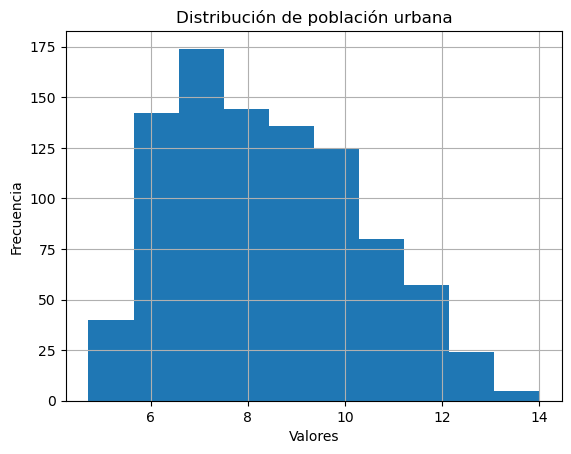

In [77]:
#Poblacion rural
df_rrss_sinNaN["Log Poblacion Urbana"].hist()
plt.title("Distribución de población urbana")
plt.xlabel("Valores")
plt.ylabel("Frecuencia") 
plt.show()


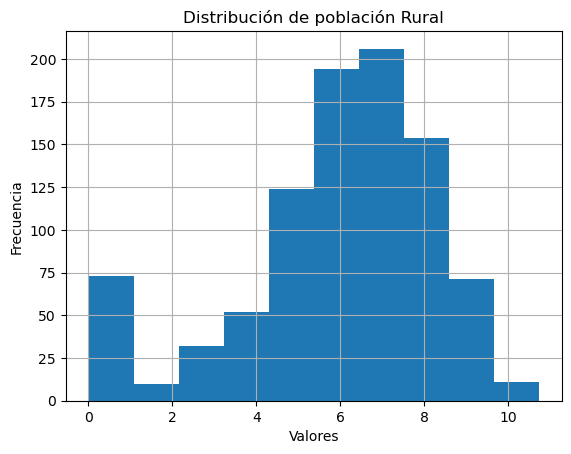

In [78]:
#Población urbana
df_rrss_sinNaN["Log Poblacion Rural"].hist()
plt.title("Distribución de población Rural")
plt.xlabel("Valores")
plt.ylabel("Frecuencia") 
plt.show()


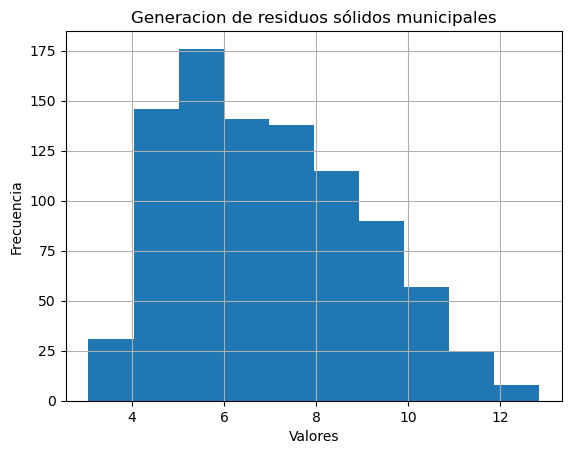

In [79]:
#Generacion de residuos municipales
df_rrss_sinNaN["Log Residuos solidos municipales"].hist()
plt.title("Generacion de residuos sólidos municipales")
plt.xlabel("Valores")
plt.ylabel("Frecuencia") 
plt.show()

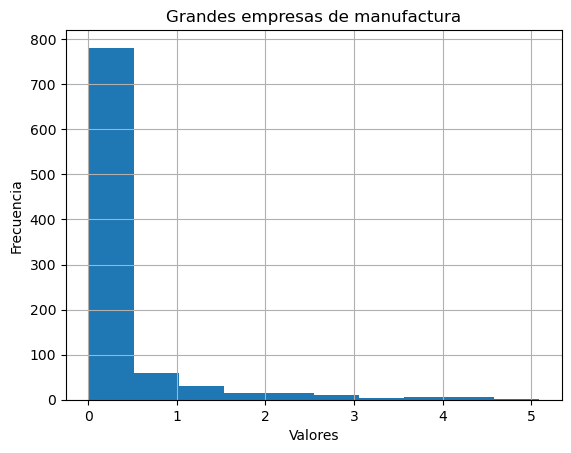

In [80]:
#Histograma de GE-Manufactura
df_rrss_sinNaN["Log GE-MANUFACTURA"].hist()
plt.title("Grandes empresas de manufactura")
plt.xlabel("Valores")
plt.ylabel("Frecuencia") 
plt.show()

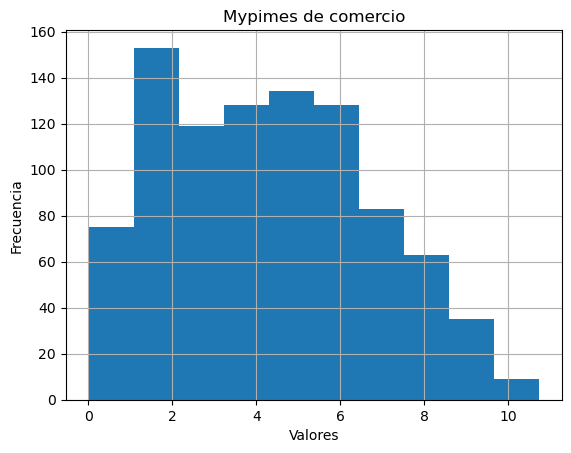

In [81]:
#Histograma de Mipyme-Manufactura
df_rrss_sinNaN["Log MiPyME-COMERCIO"].hist()
plt.title("Mypimes de comercio")
plt.xlabel("Valores")
plt.ylabel("Frecuencia") 
plt.show()

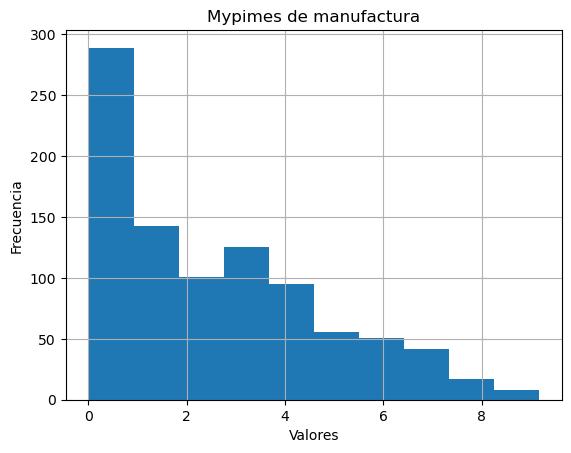

In [82]:
#Histograma de Mipyme-Manufactura
df_rrss_sinNaN["Log MiPyME-MANUFACTURA"].hist()
plt.title("Mypimes de manufactura")
plt.xlabel("Valores")
plt.ylabel("Frecuencia") 
plt.show()

In [83]:
df_var=df_rrss_sinNaN[["Log Poblacion Urbana",
                        "Log Poblacion Rural",                    
                        "Log Residuos solidos municipales",            
                        "Log MiPyME-COMERCIO",                 
                        "Log MiPyME-MANUFACTURA",              
                        "Log GE-MANUFACTURA"
                        #,"TIPO_MUNICIPALIDAD CONT"
                        ]]

In [84]:
estandarizar = StandardScaler()
estandarizar_variables = estandarizar.fit_transform(df_var)

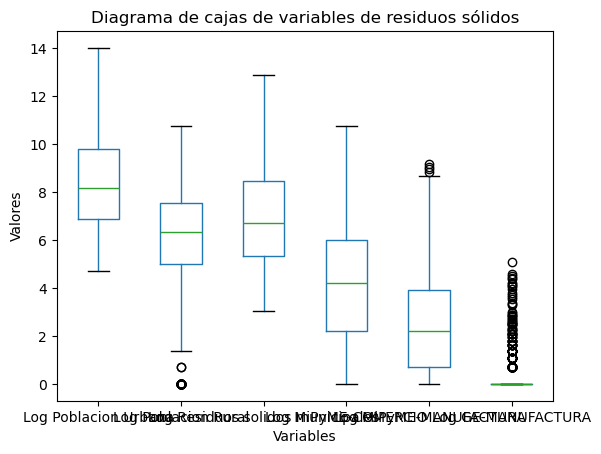

In [85]:
df_var.boxplot(column=["Log Poblacion Urbana",
                        "Log Poblacion Rural",                    
                        "Log Residuos solidos municipales",            
                        "Log MiPyME-COMERCIO",                 
                        "Log MiPyME-MANUFACTURA",              
                        "Log GE-MANUFACTURA"
                        #,"TIPO_MUNICIPALIDAD CONT"                   
                        ]
                        , grid=False)

#Añadir títulos y etiquetas
plt.title("Diagrama de cajas de variables de residuos sólidos")
plt.xlabel("Variables")
plt.ylabel("Valores")

plt.show()

<Axes: >

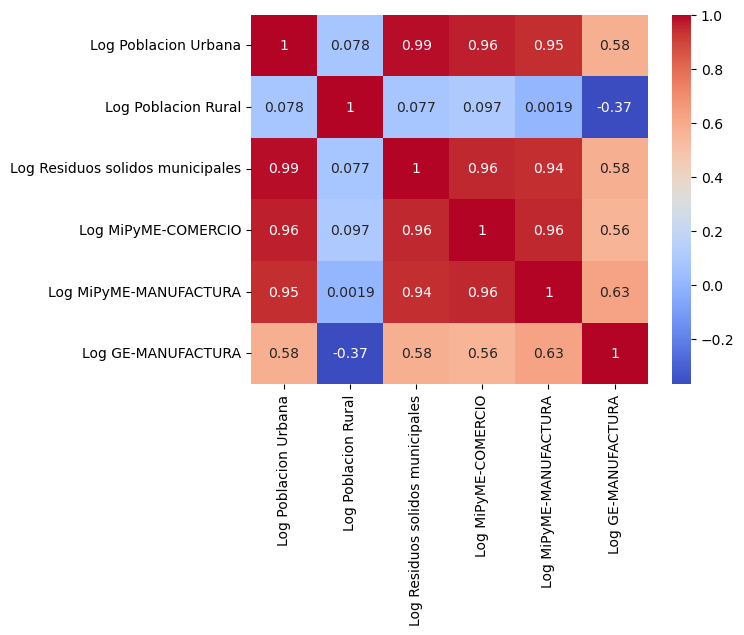

In [86]:
correlacion=df_var.corr()
sns.heatmap(correlacion, annot=True, cmap="coolwarm")

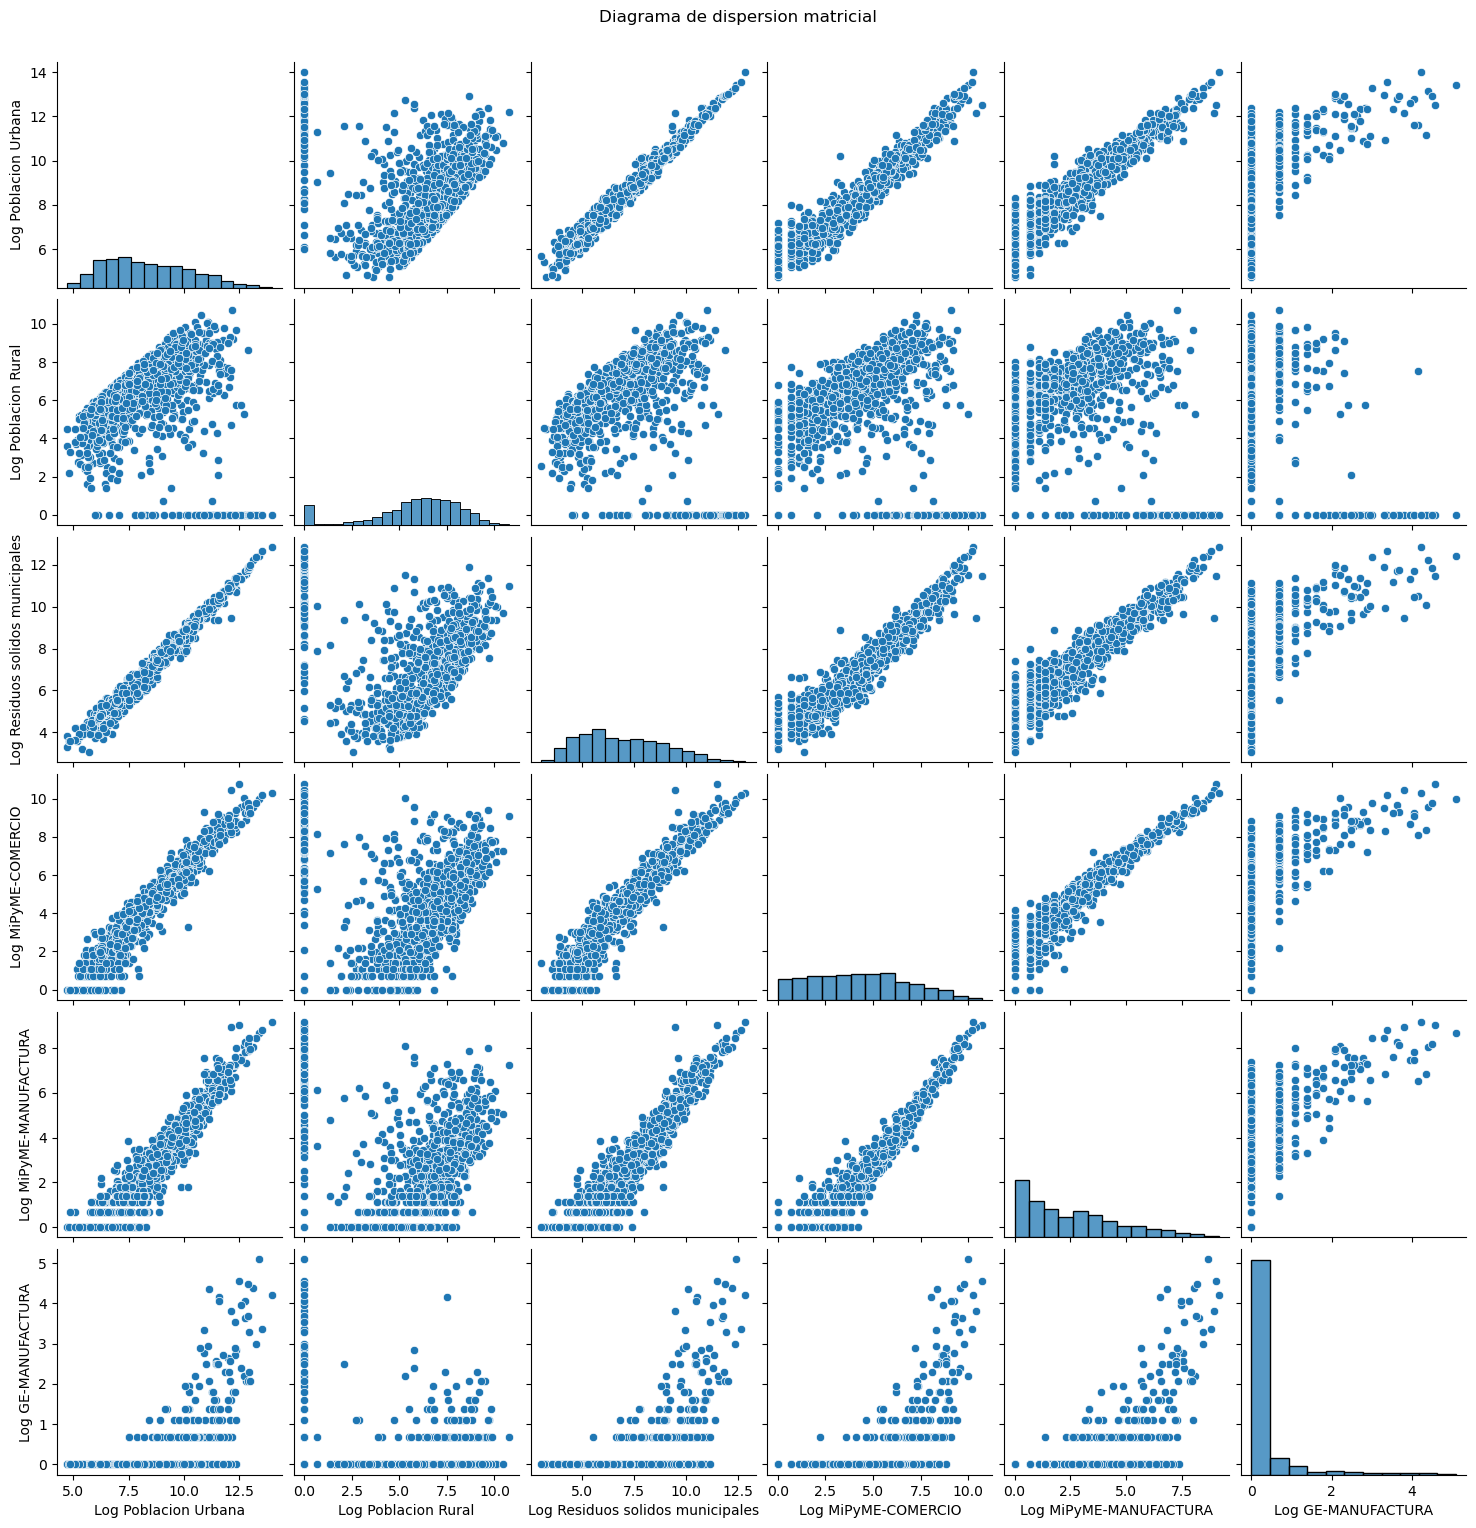

In [87]:
sns.pairplot(df_var)
plt.suptitle("Diagrama de dispersion matricial", y=1.02)
plt.show()

In [88]:
# Definir las variables independientes y dependientes
X = df_var[["Log Poblacion Urbana",
            "Log Poblacion Rural",                    
            "Log MiPyME-COMERCIO",                 
            "Log MiPyME-MANUFACTURA",              
            "Log GE-MANUFACTURA"]]
y = df_var["Log Residuos solidos municipales"]

# Agregar una constante a las variables independientes
X = sm.add_constant(X)

# Ajustar el modelo de regresión lineal
model = sm.OLS(y, X).fit()

# Resumen del modelo
print(model.summary())

                                   OLS Regression Results                                   
Dep. Variable:     Log Residuos solidos municipales   R-squared:                       0.979
Model:                                          OLS   Adj. R-squared:                  0.979
Method:                               Least Squares   F-statistic:                     8650.
Date:                              Tue, 27 Aug 2024   Prob (F-statistic):               0.00
Time:                                      22:10:12   Log-Likelihood:                -171.26
No. Observations:                               927   AIC:                             354.5
Df Residuals:                                   921   BIC:                             383.5
Df Model:                                         5                                         
Covariance Type:                          nonrobust                                         
                             coef    std err          t      P>|t|    

In [89]:
#Creamos el PCA
pca = PCA(n_components=3)
principal_components = pca.fit_transform(estandarizar_variables)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2',"PC3"], index=df_rrss_sinNaN.index)
print(pca_df)



           PC1       PC2       PC3
0    -2.407337 -0.244520  0.429942
1    -2.489983 -0.701380  0.189805
2    -2.130627 -0.668196  0.053318
4    -2.773997 -0.605967  0.372494
7    -2.391567 -0.992291 -0.026902
...        ...       ...       ...
1884  1.481936  0.329043  0.319921
1885  4.266689  0.876122  1.058181
1887  3.623978  0.852679  0.930859
1888  3.379082  0.704529  0.457446
1889  2.173135  0.694946  0.948801

[927 rows x 3 columns]


[0.71540665 0.20674014 0.05835007]


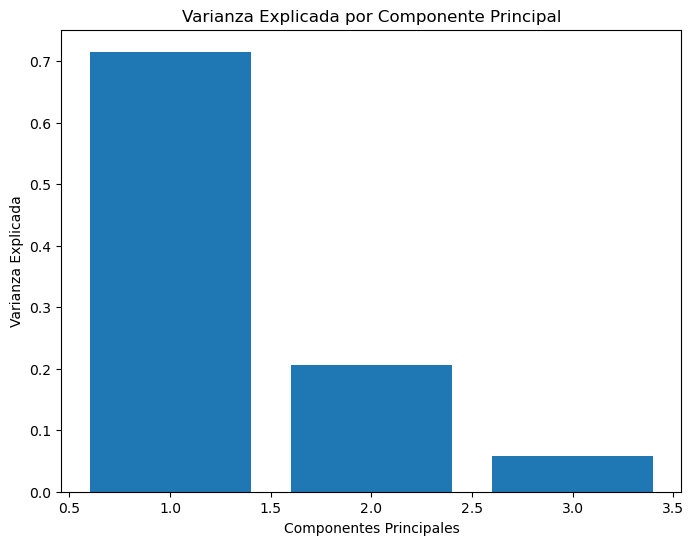

In [90]:
# Varianza explicada
explained_variance = pca.explained_variance_ratio_

print(explained_variance)

# Crear el gráfico de varianza explicada
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance)
plt.xlabel('Componentes Principales')
plt.ylabel('Varianza Explicada')
plt.title('Varianza Explicada por Componente Principal')
plt.show()

In [91]:
#plt.figure(figsize=(8, 6))
#plt.scatter(pca_df['PC1'], pca_df['PC2'], cmap='viridis')
#plt.xlabel('Principal Component 1')
#plt.ylabel('Principal Component 2')
#plt.title('PCA de los datos')
#plt.colorbar()
#plt.show()

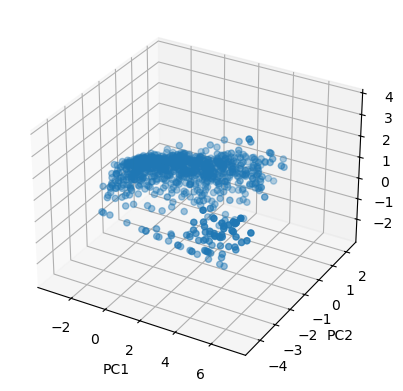

In [92]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

c:\Users\ymnl_\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


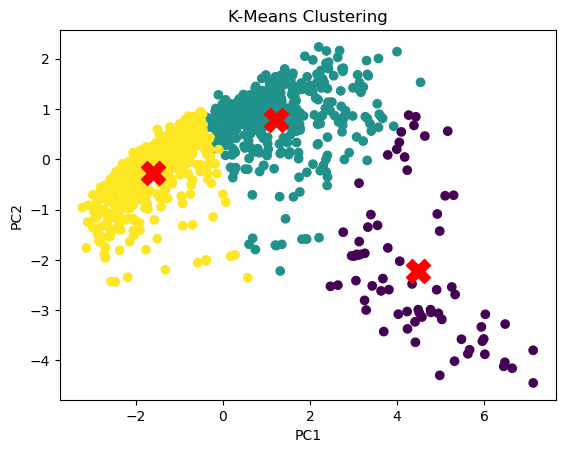

In [93]:
#clusterizamos con la cantidad de clusteres que deseamos y con las paradas e iteraciones
kmeans = KMeans(n_clusters=3, max_iter=300, tol=1e-4, random_state=42)

#Ajustamos el modelo
kmeans.fit(pca_df)

#Obtenemos los centroides y las etiquetas:
centroides = kmeans.cluster_centers_
etiquetas = kmeans.labels_

pca_df['Cluster2'] = etiquetas

plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster2'], cmap='viridis')
plt.scatter(centroides[:, 0], centroides[:, 1], s=300, c='red', marker='X')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-Means Clustering')
plt.show()

In [94]:
componentes_pca=pd.DataFrame(pca.components_,columns=df_var.columns, index=['PC1', 'PC2', 'PC3'])
print(componentes_pca)

     Log Poblacion Urbana  Log Poblacion Rural  \
PC1              0.472902            -0.001044   
PC2              0.102143             0.854925   
PC3             -0.149159             0.516010   

     Log Residuos solidos municipales  Log MiPyME-COMERCIO  \
PC1                          0.471822             0.468763   
PC2                          0.100176             0.120479   
PC3                         -0.142139            -0.155852   

     Log MiPyME-MANUFACTURA  Log GE-MANUFACTURA  
PC1                0.470834            0.335147  
PC2                0.022997           -0.483311  
PC3               -0.125833            0.806944  


c:\Users\ymnl_\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


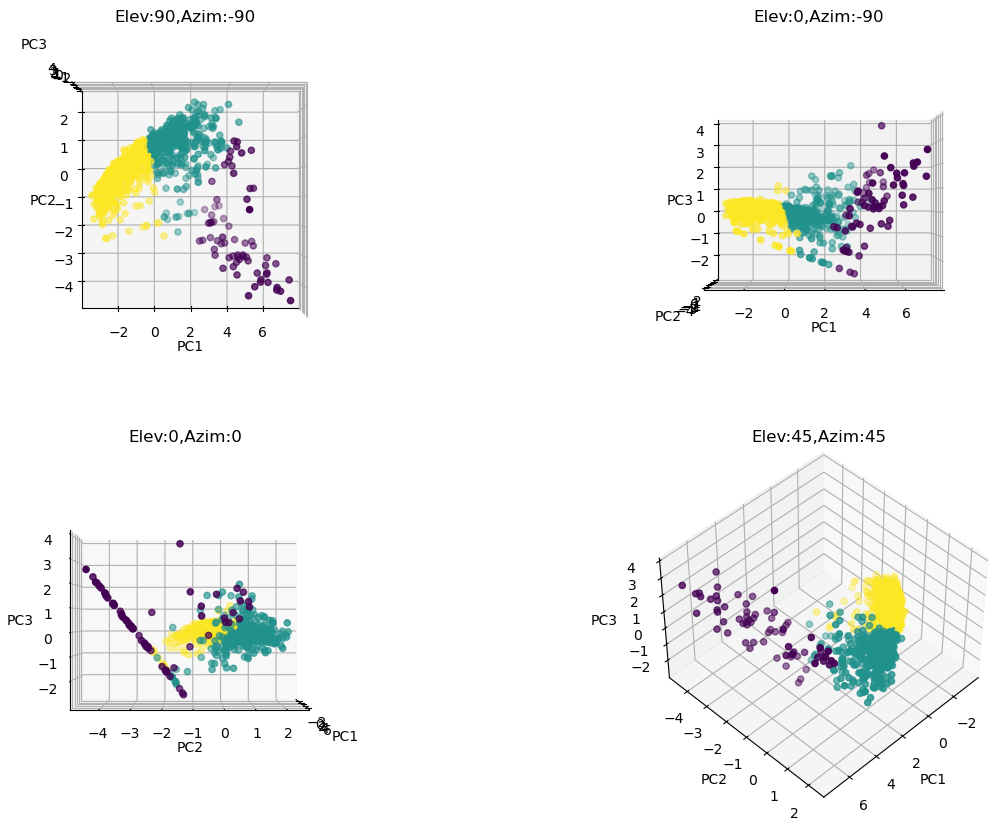

In [95]:
#clusterizamos con la cantidad de clusteres que deseamos y con las paradas e iteraciones
kmeans = KMeans(n_clusters=3)

clusters = kmeans.fit_predict(principal_components)
pca_df['Cluster'] = clusters

# Visualizar clusters
#Le damos el tamaño a los gráficos
fig = plt.figure(figsize=(15,10))

#Damos los angulos de visualización
angulos=[(90,-90),(0,-90),(0,0),(45,45)]

for i, (elev,azim) in enumerate(angulos):
    ax = fig.add_subplot(2, 2, i+1, projection='3d')
    scatter = ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], c=pca_df['Cluster2'], cmap='viridis')
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    ax.set_title(f'Elev:{elev},Azim:{azim}')
    ax.view_init(elev=elev, azim=azim)
plt.show()
    

In [96]:
df_dataOriginal_PCA=pd.concat([df_rrss_sinNaN,pca_df], axis=1)
print(df_dataOriginal_PCA)

      IDDIST   NOMBDEP          NOMBPROV       NOMBDIST  \
0      10111  AMAZONAS       CHACHAPOYAS        LEVANTO   
1      10516  AMAZONAS              LUYA  SAN CRISTOBAL   
2      20513    ANCASH         BOLOGNESI        PACLLON   
4      20902    ANCASH           CORONGO            ACO   
7      21703    ANCASH            RECUAY     COTAPARACO   
...      ...       ...               ...            ...   
1884  240102    TUMBES            TUMBES       CORRALES   
1885  250101   UCAYALI  CORONEL PORTILLO       CALLERIA   
1887  250105   UCAYALI  CORONEL PORTILLO    YARINACOCHA   
1888  250107   UCAYALI  CORONEL PORTILLO       MANANTAY   
1889  250301   UCAYALI        PADRE ABAD     PADRE ABAD   

         NOM_CAPITAL (LEGAL)  COD_ REG_NAT REGION NATURAL REGION_NATURAL  \
0                    LEVANTO             2         SIERRA         SIERRA   
1                       OLTO             2         SIERRA         SIERRA   
2                    PACLLON             2         SIERRA      